In [2]:
#for gathering data from Reddit
import praw #Python Reddit API wrapper
import pandas as pd #data frame
from praw.models import MoreComments
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import emoji #remove emoji
import re #remove links
import en_core_web_sm
import spacy

In [2]:
!pip install --upgrade emoji

  Using cached emoji-2.2.0-py3-none-any.whl
  Attempting uninstall: emoji
    Found existing installation: emoji 1.0.0
    Uninstalling emoji-1.0.0:
      Successfully uninstalled emoji-1.0.0


In [3]:
#for gathering data from Reddit
import praw #Python Reddit API wrapper
import pandas as pd #data frame
from praw.models import MoreComments
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import emoji #remove emoji
import re #remove links
import en_core_web_sm
import spacy

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [5]:
!pip install en_core_web_sm


ERROR: Could not find a version that satisfies the requirement en_core_web_sm (from versions: none)
ERROR: No matching distribution found for en_core_web_sm


In [5]:
import spacy

In [6]:
import en_core_web_sm

In [7]:
!pip show nltk

Name: nltk
Version: 3.8.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: c:\users\ganja\anaconda3\lib\site-packages
Requires: click, joblib, regex, tqdm
Required-by: 


In [8]:
!pip install --upgrade nltk

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist

In [10]:
!pip install en_core_web_sm


In [11]:
!pip install spacy


In [12]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 12.8/12.8 MB 1.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:
spacy.load('en_core_web_sm')

In [14]:
import en_core_web_sm

In [15]:
import gensim
from gensim import corpora

In [16]:
reddit = praw.Reddit(client_id="2HIwI8CvGnWs4EhtmiDj8A", 
                     client_secret="tMg0CaYCq1JIK52M6zmlIkQMevD6Fg", 
                     user_agent="TEST API")

In [17]:
subreddit = reddit.subreddit('popular')

for submission in subreddit.search('TDD', limit=5):
    print('Title:', submission.title)
    print('Author:', submission.author)
    print('Upvotes:', submission.score)
    print('URL:', submission.url)

Title: TDD is super important and useful!
Author: PizzaConBacon
Upvotes: 12593
URL: https://i.redd.it/nevopagtgzha1.jpg
Title: Is TDD anywhere to be found in the real world?
Author: SlowAside5
Upvotes: 263
URL: https://www.reddit.com/r/ExperiencedDevs/comments/10m8yr1/is_tdd_anywhere_to_be_found_in_the_real_world/
Title: TDD (Total Dorn Death) will be achieved!
Author: Histovan
Upvotes: 115
URL: https://v.redd.it/zvpmpif3iwta1
Title: Underrated TDD
Author: paperlaner94
Upvotes: 551
URL: https://v.redd.it/lhep0qnyd7ga1
Title: Tips for getting into the habit of TDD?
Author: DwaywelayTOP
Upvotes: 27
URL: https://www.reddit.com/r/ExperiencedDevs/comments/10ujjf6/tips_for_getting_into_the_habit_of_tdd/


In [18]:
Post1 = reddit.submission(id='11164wl')

In [40]:
Comments_All = [] #store all comments in a list
Post1.comments.replace_more(limit=None)
for comments in Post1.comments.list():
    Comments_All.append(comments.body)
    
print(Comments_All, '\n')
print('Total Comments Scrapped=', (len(Comments_All)))

['I love doing my TDD after I finish the development', 'Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"\n\nMe doing TDD: "UGH"', 'For me it\'s just another tool to use when I get annoyed with my other tools.\n\nI tend to pull it out when I\'m having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). \n\nIterating over that is better than being stuck.', 'Here is my three steps to test driven development:\n\n1. Write the tests\n2. Write the code\n3. Change the tests so the code passes', "I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there's no time for testing because of the stakeholders' deadline.", 'Amateurs do TDD! We do IDD (incident driven development).', 'Had a partner company demo their TDD workflow to us once. Took them TWO HOURS to add a single h

In [21]:
List1 = Comments_All
List1 = [str(i) for i in List1] #map to a list of strings
string_uncleaned = ','.join(List1) #join all the strings separated by comma
string_uncleaned

'I love doing my TDD after I finish the development,Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"\n\nMe doing TDD: "UGH",For me it\'s just another tool to use when I get annoyed with my other tools.\n\nI tend to pull it out when I\'m having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). \n\nIterating over that is better than being stuck.,Here is my three steps to test driven development:\n\n1. Write the tests\n2. Write the code\n3. Change the tests so the code passes,I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there\'s no time for testing because of the stakeholders\' deadline.,Amateurs do TDD! We do IDD (incident driven development).,Had a partner company demo their TDD workflow to us once. Took them TWO HOURS to add a single hyperlink to their

In [22]:
List1 = Comments_All
List1 = [str(i) for i in List1] #map to a list of strings
string_uncleaned = ','.join(List1) #join all the strings separated by comma
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
string_emojiless = emoji_pattern.sub(r'', string_uncleaned)
print(string_emojiless)

I love doing my TDD after I finish the development,Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"

Me doing TDD: "UGH",For me it's just another tool to use when I get annoyed with my other tools.

I tend to pull it out when I'm having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). 

Iterating over that is better than being stuck.,Here is my three steps to test driven development:

1. Write the tests
2. Write the code
3. Change the tests so the code passes,I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there's no time for testing because of the stakeholders' deadline.,Amateurs do TDD! We do IDD (incident driven development).,Had a partner company demo their TDD workflow to us once. Took them TWO HOURS to add a single hyperlink to their home page.

Bu

In [23]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(string_emojiless)
print(tokenized_string)

['I', 'love', 'doing', 'my', 'TDD', 'after', 'I', 'finish', 'the', 'development', 'Me', 'reading', 'about', 'TDD', 'This', 'is', 'amazing', 'It', 'makes', 'so', 'much', 'sense', 'Of', 'course', 'Me', 'doing', 'TDD', 'UGH', 'For', 'me', 'it', 's', 'just', 'another', 'tool', 'to', 'use', 'when', 'I', 'get', 'annoyed', 'with', 'my', 'other', 'tools', 'I', 'tend', 'to', 'pull', 'it', 'out', 'when', 'I', 'm', 'having', 'the', 'programmer', 'version', 'of', 'writers', 'block', 'It', 'then', 'helps', 'me', 'to', 'start', 'with', 'a', 'known', 'set', 'of', 'conditions', 'the', 'failing', 'test', 'and', 'then', 'work', 'toward', 'a', 'specific', 'solution', 'a', 'successful', 'test', 'Iterating', 'over', 'that', 'is', 'better', 'than', 'being', 'stuck', 'Here', 'is', 'my', 'three', 'steps', 'to', 'test', 'driven', 'development', '1', 'Write', 'the', 'tests', '2', 'Write', 'the', 'code', '3', 'Change', 'the', 'tests', 'so', 'the', 'code', 'passes', 'I', 'love', 'when', 'prospective', 'employers'

In [24]:
lower_string_tokenized = [word.lower() for word in tokenized_string]
print(lower_string_tokenized)

['i', 'love', 'doing', 'my', 'tdd', 'after', 'i', 'finish', 'the', 'development', 'me', 'reading', 'about', 'tdd', 'this', 'is', 'amazing', 'it', 'makes', 'so', 'much', 'sense', 'of', 'course', 'me', 'doing', 'tdd', 'ugh', 'for', 'me', 'it', 's', 'just', 'another', 'tool', 'to', 'use', 'when', 'i', 'get', 'annoyed', 'with', 'my', 'other', 'tools', 'i', 'tend', 'to', 'pull', 'it', 'out', 'when', 'i', 'm', 'having', 'the', 'programmer', 'version', 'of', 'writers', 'block', 'it', 'then', 'helps', 'me', 'to', 'start', 'with', 'a', 'known', 'set', 'of', 'conditions', 'the', 'failing', 'test', 'and', 'then', 'work', 'toward', 'a', 'specific', 'solution', 'a', 'successful', 'test', 'iterating', 'over', 'that', 'is', 'better', 'than', 'being', 'stuck', 'here', 'is', 'my', 'three', 'steps', 'to', 'test', 'driven', 'development', '1', 'write', 'the', 'tests', '2', 'write', 'the', 'code', '3', 'change', 'the', 'tests', 'so', 'the', 'code', 'passes', 'i', 'love', 'when', 'prospective', 'employers'

In [25]:
nlp = en_core_web_sm.load()
all_stopwords = nlp.Defaults.stop_words
text = lower_string_tokenized
tokens_without_sw = [word for word in text if not word in all_stopwords]
print(tokens_without_sw)

['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'makes', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tools', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writers', 'block', 'helps', 'start', 'known', 'set', 'conditions', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'steps', 'test', 'driven', 'development', '1', 'write', 'tests', '2', 'write', 'code', '3', 'change', 'tests', 'code', 'passes', 'love', 'prospective', 'employers', 'clients', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholders', 'deadline', 'amateurs', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hours', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pass', '8', 'tests', 'fine', 'better', 'way', 'fix', 'bugs', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smas

In [26]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'make', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tool', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writer', 'block', 'help', 'start', 'known', 'set', 'condition', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'step', 'test', 'driven', 'development', '1', 'write', 'test', '2', 'write', 'code', '3', 'change', 'test', 'code', 'pass', 'love', 'prospective', 'employer', 'client', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholder', 'deadline', 'amateur', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hour', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pas', '8', 'test', 'fine', 'better', 'way', 'fix', 'bug', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smashing', 'boring', '

In [27]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ganja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'make', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tool', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writer', 'block', 'help', 'start', 'known', 'set', 'condition', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'step', 'test', 'driven', 'development', '1', 'write', 'test', '2', 'write', 'code', '3', 'change', 'test', 'code', 'pass', 'love', 'prospective', 'employer', 'client', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholder', 'deadline', 'amateur', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hour', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pas', '8', 'test', 'fine', 'better', 'way', 'fix', 'bug', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smashing', 'boring', '

In [29]:
from nltk.stem import WordNetLemmatizer

In [30]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'make', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tool', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writer', 'block', 'help', 'start', 'known', 'set', 'condition', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'step', 'test', 'driven', 'development', '1', 'write', 'test', '2', 'write', 'code', '3', 'change', 'test', 'code', 'pass', 'love', 'prospective', 'employer', 'client', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholder', 'deadline', 'amateur', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hour', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pas', '8', 'test', 'fine', 'better', 'way', 'fix', 'bug', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smashing', 'boring', '

In [31]:
import nltk
nltk.download('omw')


[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\ganja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [32]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'make', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tool', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writer', 'block', 'help', 'start', 'known', 'set', 'condition', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'step', 'test', 'driven', 'development', '1', 'write', 'test', '2', 'write', 'code', '3', 'change', 'test', 'code', 'pass', 'love', 'prospective', 'employer', 'client', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholder', 'deadline', 'amateur', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hour', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pas', '8', 'test', 'fine', 'better', 'way', 'fix', 'bug', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smashing', 'boring', '

In [34]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ganja\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ganja\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ganja\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ganja\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\ganja\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

True

In [33]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'make', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tool', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writer', 'block', 'help', 'start', 'known', 'set', 'condition', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'step', 'test', 'driven', 'development', '1', 'write', 'test', '2', 'write', 'code', '3', 'change', 'test', 'code', 'pass', 'love', 'prospective', 'employer', 'client', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholder', 'deadline', 'amateur', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hour', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pas', '8', 'test', 'fine', 'better', 'way', 'fix', 'bug', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smashing', 'boring', '

In [34]:
stemmer = PorterStemmer()
stem_tokens = ([stemmer.stem(s) for s in tokens_without_sw])
print(stem_tokens)

['love', 'tdd', 'finish', 'develop', 'read', 'tdd', 'amaz', 'make', 'sens', 'cours', 'tdd', 'ugh', 's', 'tool', 'use', 'annoy', 'tool', 'tend', 'pull', 'm', 'have', 'programm', 'version', 'writer', 'block', 'help', 'start', 'known', 'set', 'condit', 'fail', 'test', 'work', 'specif', 'solut', 'success', 'test', 'iter', 'better', 'stuck', 'step', 'test', 'driven', 'develop', '1', 'write', 'test', '2', 'write', 'code', '3', 'chang', 'test', 'code', 'pass', 'love', 'prospect', 'employ', 'client', 'excit', 'understand', 'tdd', 'agil', 'tell', 's', 'time', 'test', 'stakehold', 'deadlin', 'amateur', 'tdd', 'idd', 'incid', 'driven', 'develop', 'partner', 'compani', 'demo', 'tdd', 'workflow', 'took', 'hour', 'add', 'singl', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pass', '8', 'test', 'fine', 'better', 'way', 'fix', 'bug', 'great', 'greenfield', 'dev', 'know', 'structur', 'build', 's', 'great', 'smash', 'bore', 'repetit', 'code', 'defect', 'capabl', 'tdd', 'isn', 't', 'write', 'unit', '

In [35]:
cleaned_output = lemmatized_tokens

In [36]:
print("original length of words=", (len(string_uncleaned)))
print("no.of words after removing emojis=", (len(string_emojiless)))
print("no.of words afetr tokenizing and cleaning=", (len(tokenized_string)))
print("no.of words afetr tokenizing and cleaning and removing stop words =", (len(tokens_without_sw)))
print("no.of words afetr tokenizing and cleaning, removing stop words and lemmatizing =", (len(lemmatized_tokens)))
print("no.of words after final output = ", (len(cleaned_output)))

original length of words= 124807
no.of words after removing emojis= 124796
no.of words afetr tokenizing and cleaning= 23341
no.of words afetr tokenizing and cleaning and removing stop words = 10512
no.of words afetr tokenizing and cleaning, removing stop words and lemmatizing = 10512
no.of words after final output =  10512


In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

for sentences in cleaned_output:
    pol_score = sia.polarity_scores(sentences)
    pol_score['words'] = sentences
    results.append(pol_score)
    
pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,words
0,0.0,0.0,1.0,0.6369,love
1,0.0,1.0,0.0,0.0000,tdd
2,0.0,1.0,0.0,0.0000,finish
3,0.0,1.0,0.0,0.0000,development
4,0.0,1.0,0.0,0.0000,reading
...,...,...,...,...,...
10507,0.0,1.0,0.0,0.0000,test
10508,0.0,1.0,0.0,0.0000,suite
10509,0.0,1.0,0.0,0.0000,making
10510,0.0,1.0,0.0,0.0000,major


In [40]:
df['label'] = 0
df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] > -0.10, 'label'] = -1
df.head()

,neg,neu,pos,compound,words,label
0,0.0,0.0,1.0,0.6369,love,-1
1,0.0,1.0,0.0,0.0000,tdd,-1
2,0.0,1.0,0.0,0.0000,finish,-1
3,0.0,1.0,0.0,0.0000,development,-1
4,0.0,1.0,0.0,0.0000,reading,-1


In [41]:
print(df.label.value_counts())

-1    10101
 0      411
Name: label, dtype: int64


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

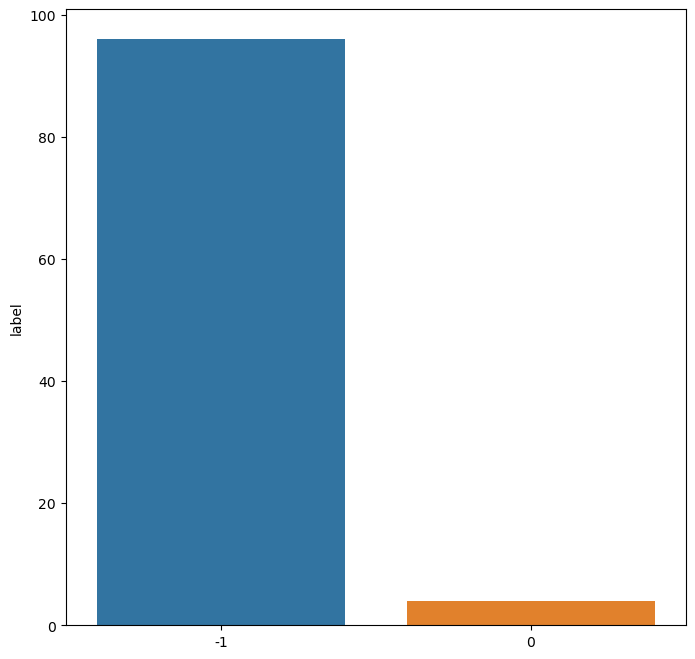

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['negative','neutral','positive'])
ax.set_ylabel("percentage")
plt.show()

In [44]:
counts = df.label.value_counts(normalize=True)*100
counts = counts.reindex(['negative', 'neutral', 'positive'], fill_value=0)
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['negative', 'neutral', 'positive'])
ax.set_ylabel("percentage")
plt.show()


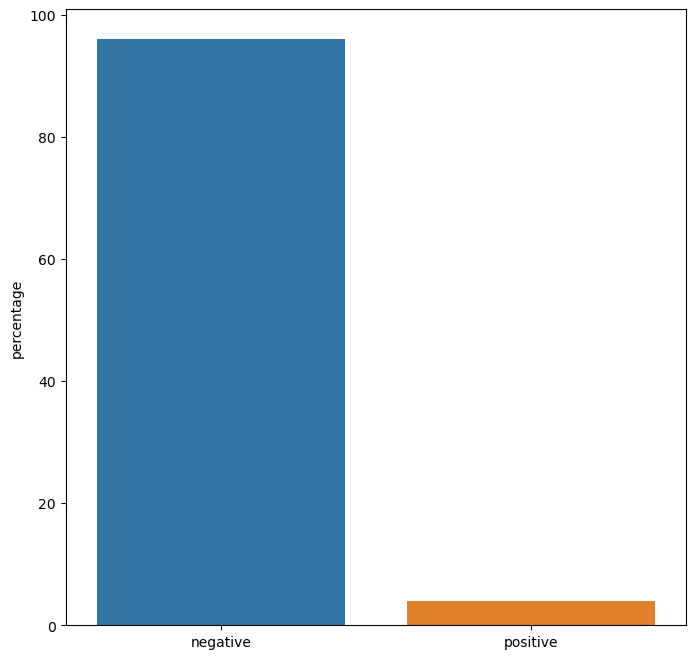

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['negative','positive']) # Remove 'neutral' from the list of labels
ax.set_ylabel("percentage")
plt.show()


In [49]:
positive_words = list(df.loc[df['label']==1].words)
print(positive_words)

[]


In [50]:
negative_words = list(df.loc[df['label']==-1].words)
print(negative_words)

['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'make', 'sense', 'course', 'tdd', 's', 'tool', 'use', 'tool', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writer', 'help', 'start', 'known', 'set', 'condition', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'step', 'test', 'driven', 'development', '1', 'write', 'test', '2', 'write', 'code', '3', 'change', 'test', 'code', 'pass', 'love', 'prospective', 'employer', 'client', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholder', 'deadline', 'amateur', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hour', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pas', '8', 'test', 'fine', 'better', 'way', 'fix', 'bug', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smashing', 'code', 'capable', 'tdd', 'isn', 't', 'writing', 'unit', '

In [51]:
negative_frequency= FreqDist(negative_words)
neg_freq = negative_frequency.most_common(20)
neg_freq

[('test', 598),
 ('code', 258),
 ('t', 256),
 ('tdd', 254),
 ('s', 213),
 ('write', 148),
 ('work', 124),
 ('don', 103),
 ('know', 93),
 ('time', 87),
 ('like', 82),
 ('need', 79),
 ('way', 74),
 ('writing', 74),
 ('function', 71),
 ('change', 67),
 ('case', 62),
 ('testing', 58),
 ('m', 55),
 ('thing', 52)]

In [52]:
Pos_words = [str(p) for p in pos_freq]
Pos_words_string = ','.join(Pos_words)

NameError: name 'pos_freq' is not defined

In [53]:
positive_frequency= FreqDist(positive_words)
pos_freq = positive_frequency.most_common(20)
pos_freq

[]

In [54]:
Pos_words = [str(p) for p in pos_freq]
Pos_words_string = ','.join(Pos_words)

In [55]:
Neg_words = [str(n) for n in neg_freq]
Neg_words_string = ','.join(Neg_words)

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud_positive= WordCloud(background_color = 'white').generate(Pos_words_string)
wordcloud_negative= WordCloud().generate(Neg_words_string)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [57]:
import wordcloud

ModuleNotFoundError: No module named 'wordcloud'

In [58]:
!pip install wordcloud


     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00


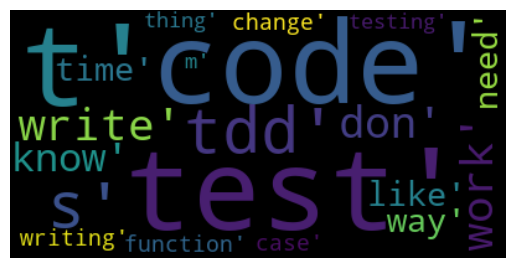

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#wordcloud_positive= WordCloud(background_color = 'white').generate(Pos_words_string)
wordcloud_negative= WordCloud().generate(Neg_words_string)
#plt.imshow(wordcloud_positive, interpolation='bilinear')
#plt.axis("off")
#plt.show()
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
Post2 = reddit.submission(id='10m8yr1')

In [64]:
Comments_All = [] #store all comments in a list
Post2.comments.replace_more(limit=None)
for comments in Post2.comments.list():
    Comments_All.append(comments.body)
    
print(Comments_All, '\n')
print('Total Comments Scrapped=', (len(Comments_All)))

['I think there’s plenty of situations where writing the test first is a bad idea, and plenty where it’s a good idea. \n\nUnfortunately, I only realize it’s a good idea after I have failed to do it.', 'I’ve got my engineers doing BDD (subclass of TDD) and it’s been very productive. IMO the issue is people really, honestly don’t know how to write tests, so TDD doesn’t help much. \n\nThere is a very pervasive style of mediocre scrum-based development out there that most people are comfortable with. Testing in that world is about getting your code coverage up even if the tests are actively counterproductive. \n\nYeah writing bad tests first is always going to end up feeling counterproductive. But guess what, it’s not TDD that’s the problem. It took me a really, really long time to figure this out and most very senior devs I encounter have yet to.', 'I’ve been trying it more and more recently and honestly it’s been super productive.\n\nFeels good to have that fast feedback loop, write soli

In [65]:
List2 = Comments_All
List2 = [str(i) for i in List2] #map to a list of strings
string_uncleaned = ','.join(List2) #join all the strings separated by comma
string_uncleaned

'I think there’s plenty of situations where writing the test first is a bad idea, and plenty where it’s a good idea. \n\nUnfortunately, I only realize it’s a good idea after I have failed to do it.,I’ve got my engineers doing BDD (subclass of TDD) and it’s been very productive. IMO the issue is people really, honestly don’t know how to write tests, so TDD doesn’t help much. \n\nThere is a very pervasive style of mediocre scrum-based development out there that most people are comfortable with. Testing in that world is about getting your code coverage up even if the tests are actively counterproductive. \n\nYeah writing bad tests first is always going to end up feeling counterproductive. But guess what, it’s not TDD that’s the problem. It took me a really, really long time to figure this out and most very senior devs I encounter have yet to.,I’ve been trying it more and more recently and honestly it’s been super productive.\n\nFeels good to have that fast feedback loop, write solid code,

In [66]:
List2 = Comments_All
List2 = [str(i) for i in List2] #map to a list of strings
string_uncleaned = ','.join(List2) #join all the strings separated by comma
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
string_emojiless = emoji_pattern.sub(r'', string_uncleaned)
print(string_emojiless)

I think there’s plenty of situations where writing the test first is a bad idea, and plenty where it’s a good idea. 

Unfortunately, I only realize it’s a good idea after I have failed to do it.,I’ve got my engineers doing BDD (subclass of TDD) and it’s been very productive. IMO the issue is people really, honestly don’t know how to write tests, so TDD doesn’t help much. 

There is a very pervasive style of mediocre scrum-based development out there that most people are comfortable with. Testing in that world is about getting your code coverage up even if the tests are actively counterproductive. 

Yeah writing bad tests first is always going to end up feeling counterproductive. But guess what, it’s not TDD that’s the problem. It took me a really, really long time to figure this out and most very senior devs I encounter have yet to.,I’ve been trying it more and more recently and honestly it’s been super productive.

Feels good to have that fast feedback loop, write solid code, and have

In [67]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(string_emojiless)
print(tokenized_string)

['I', 'think', 'there', 's', 'plenty', 'of', 'situations', 'where', 'writing', 'the', 'test', 'first', 'is', 'a', 'bad', 'idea', 'and', 'plenty', 'where', 'it', 's', 'a', 'good', 'idea', 'Unfortunately', 'I', 'only', 'realize', 'it', 's', 'a', 'good', 'idea', 'after', 'I', 'have', 'failed', 'to', 'do', 'it', 'I', 've', 'got', 'my', 'engineers', 'doing', 'BDD', 'subclass', 'of', 'TDD', 'and', 'it', 's', 'been', 'very', 'productive', 'IMO', 'the', 'issue', 'is', 'people', 'really', 'honestly', 'don', 't', 'know', 'how', 'to', 'write', 'tests', 'so', 'TDD', 'doesn', 't', 'help', 'much', 'There', 'is', 'a', 'very', 'pervasive', 'style', 'of', 'mediocre', 'scrum', 'based', 'development', 'out', 'there', 'that', 'most', 'people', 'are', 'comfortable', 'with', 'Testing', 'in', 'that', 'world', 'is', 'about', 'getting', 'your', 'code', 'coverage', 'up', 'even', 'if', 'the', 'tests', 'are', 'actively', 'counterproductive', 'Yeah', 'writing', 'bad', 'tests', 'first', 'is', 'always', 'going', 'to

In [68]:
lower_string_tokenized = [word.lower() for word in tokenized_string]
print(lower_string_tokenized)

['i', 'think', 'there', 's', 'plenty', 'of', 'situations', 'where', 'writing', 'the', 'test', 'first', 'is', 'a', 'bad', 'idea', 'and', 'plenty', 'where', 'it', 's', 'a', 'good', 'idea', 'unfortunately', 'i', 'only', 'realize', 'it', 's', 'a', 'good', 'idea', 'after', 'i', 'have', 'failed', 'to', 'do', 'it', 'i', 've', 'got', 'my', 'engineers', 'doing', 'bdd', 'subclass', 'of', 'tdd', 'and', 'it', 's', 'been', 'very', 'productive', 'imo', 'the', 'issue', 'is', 'people', 'really', 'honestly', 'don', 't', 'know', 'how', 'to', 'write', 'tests', 'so', 'tdd', 'doesn', 't', 'help', 'much', 'there', 'is', 'a', 'very', 'pervasive', 'style', 'of', 'mediocre', 'scrum', 'based', 'development', 'out', 'there', 'that', 'most', 'people', 'are', 'comfortable', 'with', 'testing', 'in', 'that', 'world', 'is', 'about', 'getting', 'your', 'code', 'coverage', 'up', 'even', 'if', 'the', 'tests', 'are', 'actively', 'counterproductive', 'yeah', 'writing', 'bad', 'tests', 'first', 'is', 'always', 'going', 'to

In [69]:
nlp = en_core_web_sm.load()
all_stopwords = nlp.Defaults.stop_words
text = lower_string_tokenized
tokens_without_sw = [word for word in text if not word in all_stopwords]
print(tokens_without_sw)

['think', 's', 'plenty', 'situations', 'writing', 'test', 'bad', 'idea', 'plenty', 's', 'good', 'idea', 'unfortunately', 'realize', 's', 'good', 'idea', 'failed', 've', 'got', 'engineers', 'bdd', 'subclass', 'tdd', 's', 'productive', 'imo', 'issue', 'people', 'honestly', 'don', 't', 'know', 'write', 'tests', 'tdd', 'doesn', 't', 'help', 'pervasive', 'style', 'mediocre', 'scrum', 'based', 'development', 'people', 'comfortable', 'testing', 'world', 'getting', 'code', 'coverage', 'tests', 'actively', 'counterproductive', 'yeah', 'writing', 'bad', 'tests', 'going', 'end', 'feeling', 'counterproductive', 'guess', 's', 'tdd', 's', 'problem', 'took', 'long', 'time', 'figure', 'senior', 'devs', 'encounter', 've', 'trying', 'recently', 'honestly', 's', 'super', 'productive', 'feels', 'good', 'fast', 'feedback', 'loop', 'write', 'solid', 'code', 'debt', 'end', 'didn', 't', 'past', 'bc', 'employers', 'teams', 'didn', 't', 'strong', 'testing', 'culture', 'current', 'employer', 'm', 'gonna', 'write

In [70]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

['think', 's', 'plenty', 'situation', 'writing', 'test', 'bad', 'idea', 'plenty', 's', 'good', 'idea', 'unfortunately', 'realize', 's', 'good', 'idea', 'failed', 've', 'got', 'engineer', 'bdd', 'subclass', 'tdd', 's', 'productive', 'imo', 'issue', 'people', 'honestly', 'don', 't', 'know', 'write', 'test', 'tdd', 'doesn', 't', 'help', 'pervasive', 'style', 'mediocre', 'scrum', 'based', 'development', 'people', 'comfortable', 'testing', 'world', 'getting', 'code', 'coverage', 'test', 'actively', 'counterproductive', 'yeah', 'writing', 'bad', 'test', 'going', 'end', 'feeling', 'counterproductive', 'guess', 's', 'tdd', 's', 'problem', 'took', 'long', 'time', 'figure', 'senior', 'devs', 'encounter', 've', 'trying', 'recently', 'honestly', 's', 'super', 'productive', 'feel', 'good', 'fast', 'feedback', 'loop', 'write', 'solid', 'code', 'debt', 'end', 'didn', 't', 'past', 'bc', 'employer', 'team', 'didn', 't', 'strong', 'testing', 'culture', 'current', 'employer', 'm', 'gonna', 'write', 'test

In [71]:
stemmer = PorterStemmer()
stem_tokens = ([stemmer.stem(s) for s in tokens_without_sw])
print(stem_tokens)

['think', 's', 'plenti', 'situat', 'write', 'test', 'bad', 'idea', 'plenti', 's', 'good', 'idea', 'unfortun', 'realiz', 's', 'good', 'idea', 'fail', 've', 'got', 'engin', 'bdd', 'subclass', 'tdd', 's', 'product', 'imo', 'issu', 'peopl', 'honestli', 'don', 't', 'know', 'write', 'test', 'tdd', 'doesn', 't', 'help', 'pervas', 'style', 'mediocr', 'scrum', 'base', 'develop', 'peopl', 'comfort', 'test', 'world', 'get', 'code', 'coverag', 'test', 'activ', 'counterproduct', 'yeah', 'write', 'bad', 'test', 'go', 'end', 'feel', 'counterproduct', 'guess', 's', 'tdd', 's', 'problem', 'took', 'long', 'time', 'figur', 'senior', 'dev', 'encount', 've', 'tri', 'recent', 'honestli', 's', 'super', 'product', 'feel', 'good', 'fast', 'feedback', 'loop', 'write', 'solid', 'code', 'debt', 'end', 'didn', 't', 'past', 'bc', 'employ', 'team', 'didn', 't', 'strong', 'test', 'cultur', 'current', 'employ', 'm', 'gonna', 'write', 'test', 'write', 'way', 'instead', 'work', 'famou', 'place', 'practic', 'rigor', 'tdd

In [72]:
cleaned_output = lemmatized_tokens

In [73]:
print("original length of words=", (len(string_uncleaned)))
print("no.of words after removing emojis=", (len(string_emojiless)))
print("no.of words afetr tokenizing and cleaning=", (len(tokenized_string)))
print("no.of words afetr tokenizing and cleaning and removing stop words =", (len(tokens_without_sw)))
print("no.of words afetr tokenizing and cleaning, removing stop words and lemmatizing =", (len(lemmatized_tokens)))
print("no.of words after final output = ", (len(cleaned_output)))

original length of words= 127907
no.of words after removing emojis= 127905
no.of words afetr tokenizing and cleaning= 23508
no.of words afetr tokenizing and cleaning and removing stop words = 10787
no.of words afetr tokenizing and cleaning, removing stop words and lemmatizing = 10787
no.of words after final output =  10787


In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

for sentences in cleaned_output:
    pol_score = sia.polarity_scores(sentences)
    pol_score['words'] = sentences
    results.append(pol_score)
    
pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,words
0,0.0,1.0,0.0,0.0000,think
1,0.0,0.0,0.0,0.0000,s
2,0.0,1.0,0.0,0.0000,plenty
3,0.0,1.0,0.0,0.0000,situation
4,0.0,1.0,0.0,0.0000,writing
...,...,...,...,...,...
10782,0.0,0.0,1.0,0.4588,luck
10783,0.0,0.0,1.0,0.5106,fun
10784,0.0,0.0,1.0,0.3182,sure
10785,0.0,0.0,1.0,0.4404,good


In [76]:
print(df.label.value_counts())

AttributeError: 'DataFrame' object has no attribute 'label'

In [77]:
df['label'] = 0
df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] > -0.10, 'label'] = -1
df.head()

,neg,neu,pos,compound,words,label
0,0.0,1.0,0.0,0.0,think,-1
1,0.0,0.0,0.0,0.0,s,-1
2,0.0,1.0,0.0,0.0,plenty,-1
3,0.0,1.0,0.0,0.0,situation,-1
4,0.0,1.0,0.0,0.0,writing,-1


In [78]:
print(df.label.value_counts())

-1    10415
 0      372
Name: label, dtype: int64


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

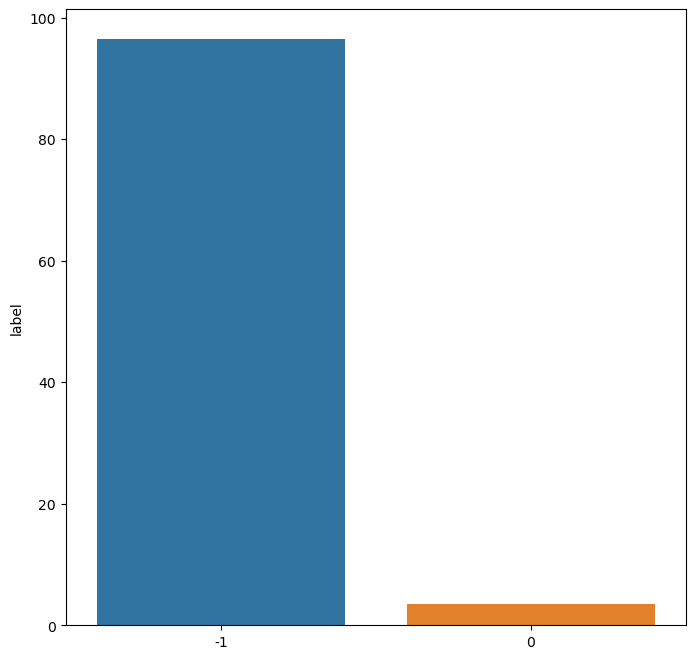

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['negative','neutral','positive'])
ax.set_ylabel("percentage")
plt.show()

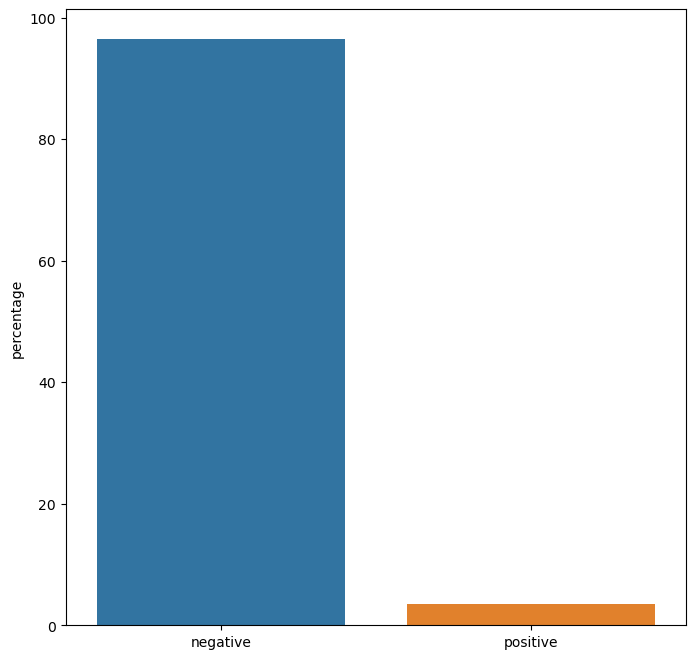

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['negative','positive']) # Remove 'neutral' from the list of labels
ax.set_ylabel("percentage")
plt.show()


In [81]:
positive_words = list(df.loc[df['label']==1].words)
print(positive_words)

[]


In [82]:
negative_words = list(df.loc[df['label']==-1].words)
print(negative_words)

['think', 's', 'plenty', 'situation', 'writing', 'test', 'idea', 'plenty', 's', 'good', 'idea', 'realize', 's', 'good', 'idea', 've', 'got', 'engineer', 'bdd', 'subclass', 'tdd', 's', 'productive', 'imo', 'issue', 'people', 'honestly', 'don', 't', 'know', 'write', 'test', 'tdd', 'doesn', 't', 'help', 'pervasive', 'style', 'mediocre', 'scrum', 'based', 'development', 'people', 'comfortable', 'testing', 'world', 'getting', 'code', 'coverage', 'test', 'actively', 'counterproductive', 'yeah', 'writing', 'test', 'going', 'end', 'feeling', 'counterproductive', 'guess', 's', 'tdd', 's', 'took', 'long', 'time', 'figure', 'senior', 'devs', 'encounter', 've', 'trying', 'recently', 'honestly', 's', 'super', 'productive', 'feel', 'good', 'fast', 'feedback', 'loop', 'write', 'solid', 'code', 'end', 'didn', 't', 'past', 'bc', 'employer', 'team', 'didn', 't', 'strong', 'testing', 'culture', 'current', 'employer', 'm', 'gonna', 'write', 'test', 'write', 'way', 'instead', 'worked', 'famous', 'place', '

In [83]:
negative_frequency= FreqDist(negative_words)
neg_freq = negative_frequency.most_common(20)
neg_freq

[('test', 515),
 ('tdd', 301),
 ('code', 247),
 ('t', 209),
 ('s', 205),
 ('write', 136),
 ('time', 105),
 ('like', 95),
 ('don', 77),
 ('writing', 76),
 ('work', 75),
 ('thing', 73),
 ('good', 64),
 ('change', 63),
 ('ve', 62),
 ('testing', 62),
 ('way', 62),
 ('think', 56),
 ('need', 51),
 ('people', 49)]

In [84]:
Pos_words = [str(p) for p in pos_freq]
Pos_words_string = ','.join(Pos_words)

In [85]:
Neg_words = [str(n) for n in neg_freq]
Neg_words_string = ','.join(Neg_words)

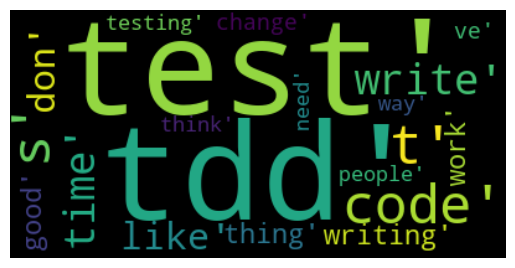

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#wordcloud_positive= WordCloud(background_color = 'white').generate(Pos_words_string)
wordcloud_negative= WordCloud().generate(Neg_words_string)
#plt.imshow(wordcloud_positive, interpolation='bilinear')
#plt.axis("off")
#plt.show()
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()